# Practice Project 3 - Wine Quality

## Dataset Description
#### The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Only physicochemical (inputs) and sensory (the output) variables are available.

In [166]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.stats import zscore
import statsmodels.api as sm
import pickle
import warnings
warnings.filterwarnings('ignore')

In [74]:
# loading the dataset
df=pd.read_csv(r'C:\Users\Sahil\Documents\DataTrained\Project Documents\Datasets\winequality-red.csv')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Setting an arbitrary cutoff for wine quality where quality greater than or equal to 6 be classified as GOOD (i.e. 1) and wine quality of anything less than 6 be classified as NOT GOOD (i.e. 0)**

In [76]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [77]:
def quality_class(row):
    if row['quality'] > 5:
        return 1
    else:
        return 0

In [78]:
df['quality_class'] = df.apply(quality_class, axis=1)
df[['quality','quality_class']].head(10)

,quality,quality_class
0,5,0
1,5,0
2,5,0
3,6,1
4,5,0
5,5,0
6,5,0
7,7,1
8,7,1
9,5,0


In [79]:
# rechecking the classification of quality
df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_class
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0


## Exploratory Data Analysis (EDA)

In [80]:
# checking columns and datatype contained in each
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  quality_class         1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


In [81]:
# checking for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
quality_class           0
dtype: int64

There are no null values in any column.

In [82]:
# describing the descriptive stats for the dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_class
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


In [83]:
# checking for unique values
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
quality_class             2
dtype: int64

### Checking for Data Imbalance

<AxesSubplot:xlabel='quality', ylabel='count'>

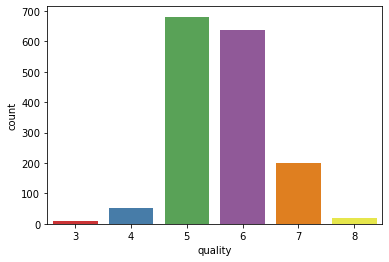

In [84]:
sns.countplot(df['quality'], palette="Set1")

However, since we have created arbitrary classification of GOOD (1) and NOT GOOD (0), we can check for class imbalance for that.

<AxesSubplot:xlabel='quality_class', ylabel='count'>

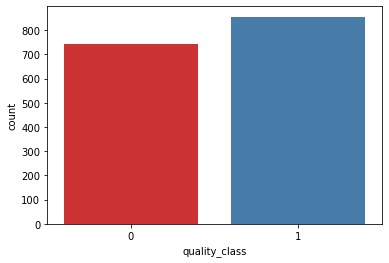

In [85]:
sns.countplot(df['quality_class'], palette="Set1")

In [86]:
df["quality_class"].value_counts()

1    855
0    744
Name: quality_class, dtype: int64

In [87]:
(855/(855+744))*100

53.47091932457786

In [88]:
(744/(855+744))*100

46.52908067542214

As a result of our arbitrary classification, the dataset appears to be balanced.

In [89]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_class
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


### Finding correlation

In [90]:
# finding the correlation
df_corr = df.corr()

In [91]:
df_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_class
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,0.095093
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,-0.321441
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,0.159129
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,-0.002160
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,-0.109494
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,-0.061757
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,-0.231963
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,-0.159110
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.003264
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.218072


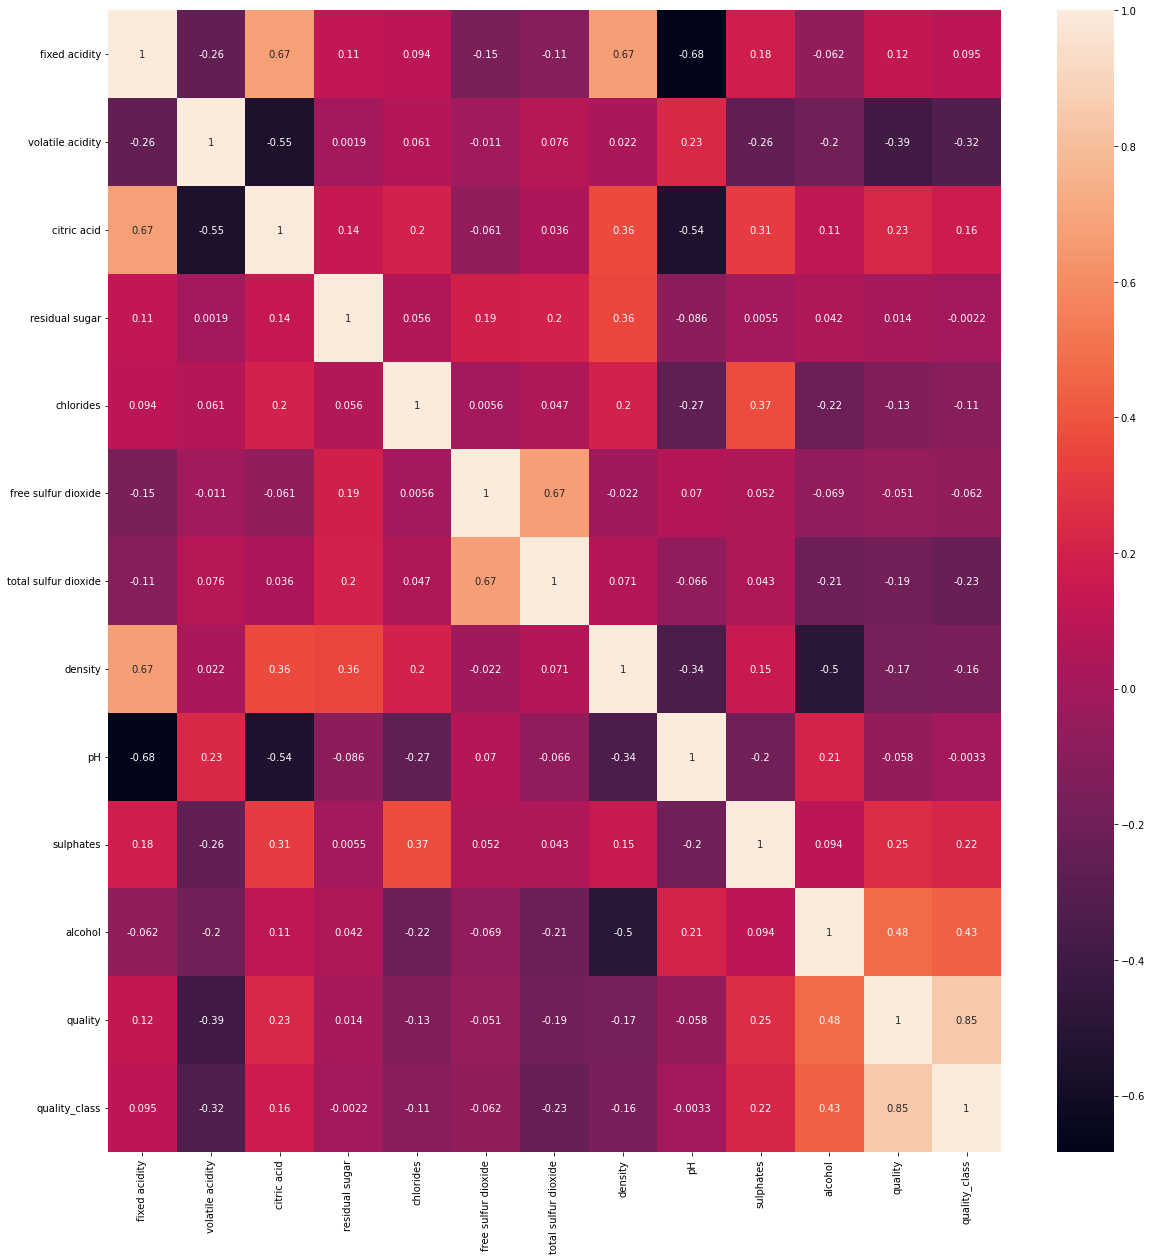

In [92]:
plt.figure(figsize=(20,21))
sns.heatmap(df_corr,annot=True)
plt.show()

1. alcohol and sulphates have good positive correlation with quality and quality_class
2. volatile acidity and total sulphur dioxide have good negative correlation with quality and quality_class
3. pH, residual sugar and free sulfur dioxide appear to have insignificant correlations with quality and quality_class

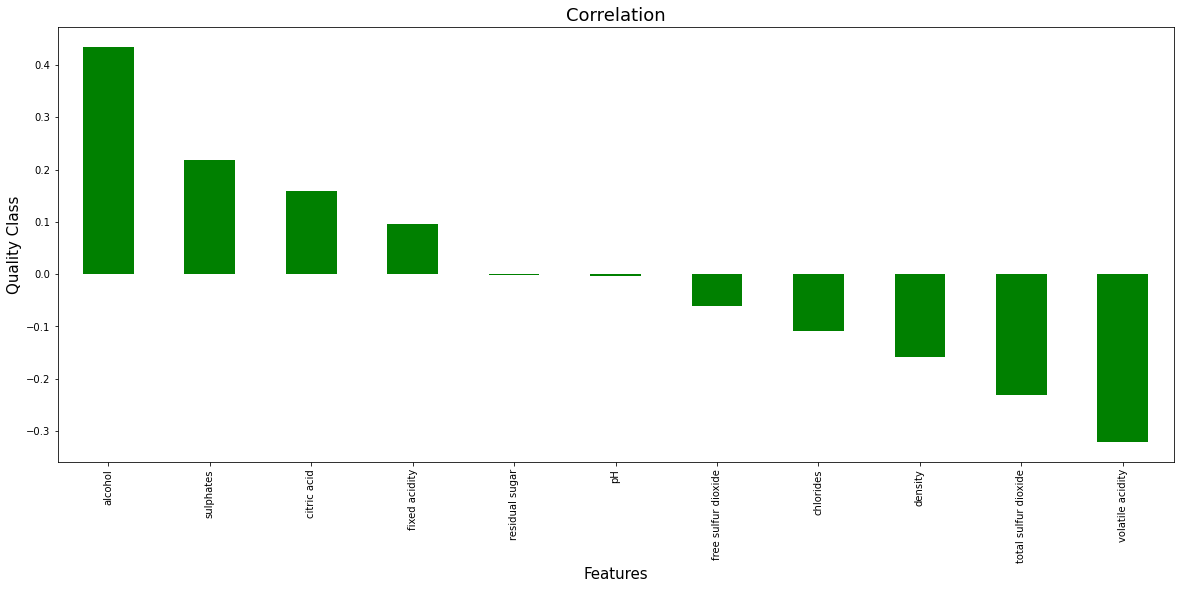

In [93]:
# finding correlation of features with label
plt.figure(figsize = (20,8))
df.corr()['quality_class'].sort_values(ascending = False).drop(['quality','quality_class']).plot(kind='bar',color = 'g')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Quality Class',fontsize=15)
plt.title('Correlation',fontsize = 18)
plt.show()

**Findings:**
1. Strong correlations: alcohol and volatile acidity
2. Good correlations: sulphates and total sulfur dioxide
3. Weak correlations: citric acid, fixed acidity, density, chlorides, and free sulfur dioxide
4. Insignificant correlations: residual sugar and pH

### Interpretation of the relationship

In [94]:
X = df.drop(columns = ['quality','quality_class'])
y = df['quality_class']

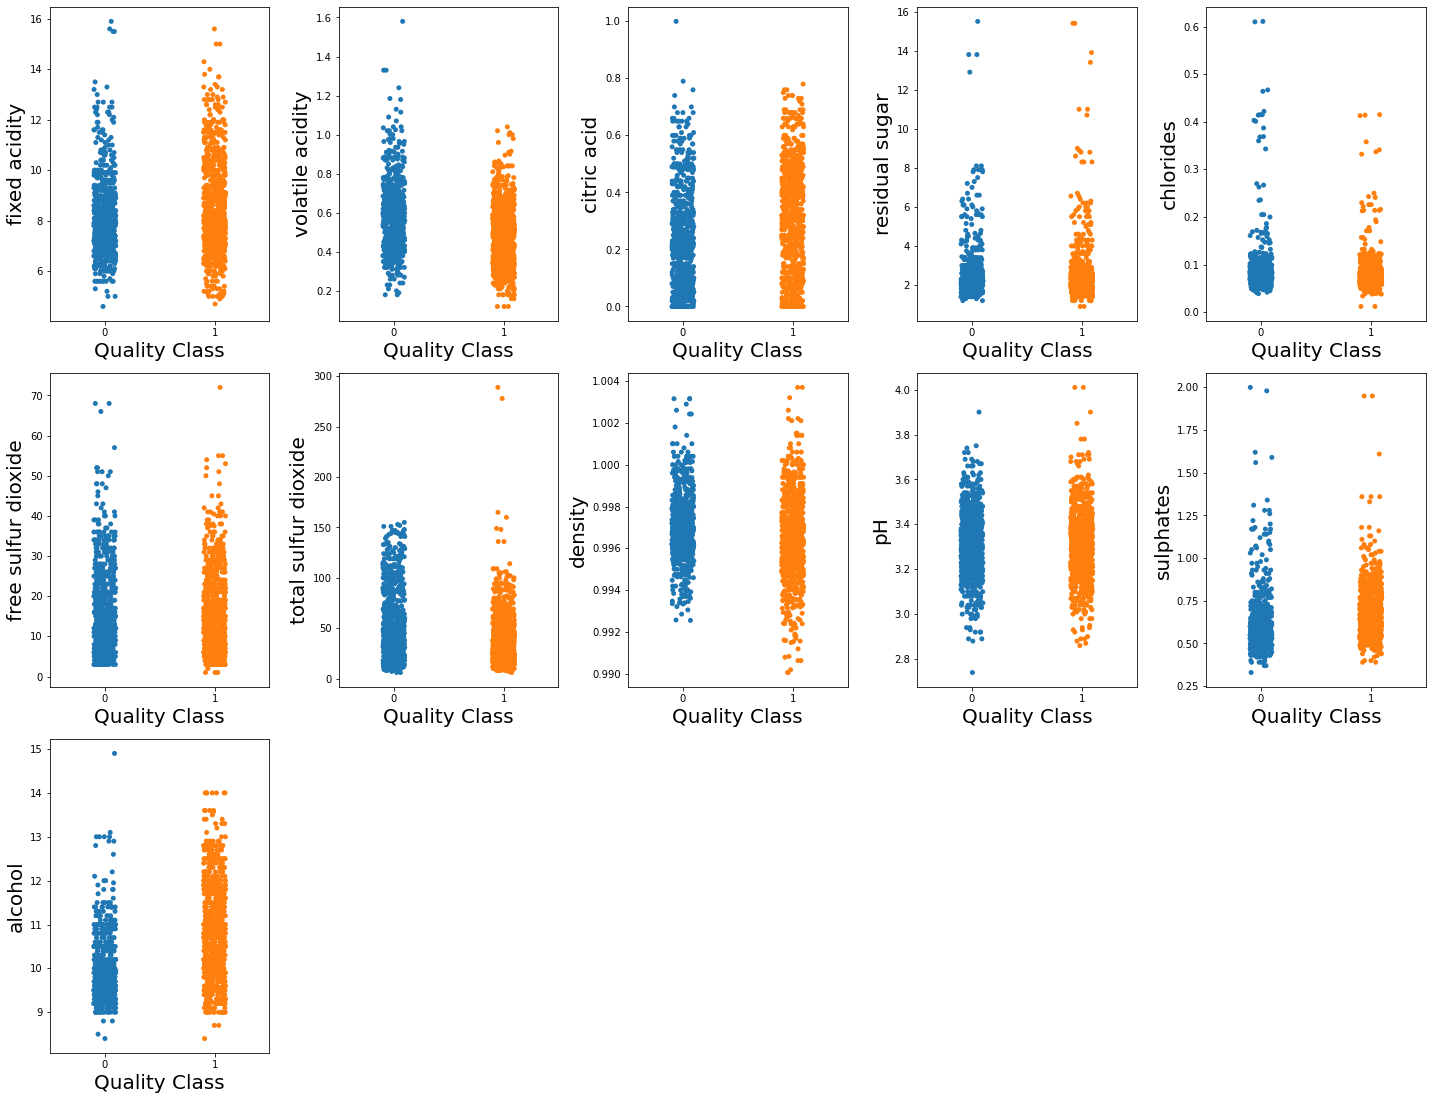

In [95]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = df['quality_class']
for col in X:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.stripplot(y,X[col])
        plt.xlabel('Quality Class',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

This confirms our previous findings that alcohol and volatile acidity are great indicators of GOOD quality wine, while pH and residual sugar are not really helping in the classification problem.

### Checking for skewness

In [96]:
X.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

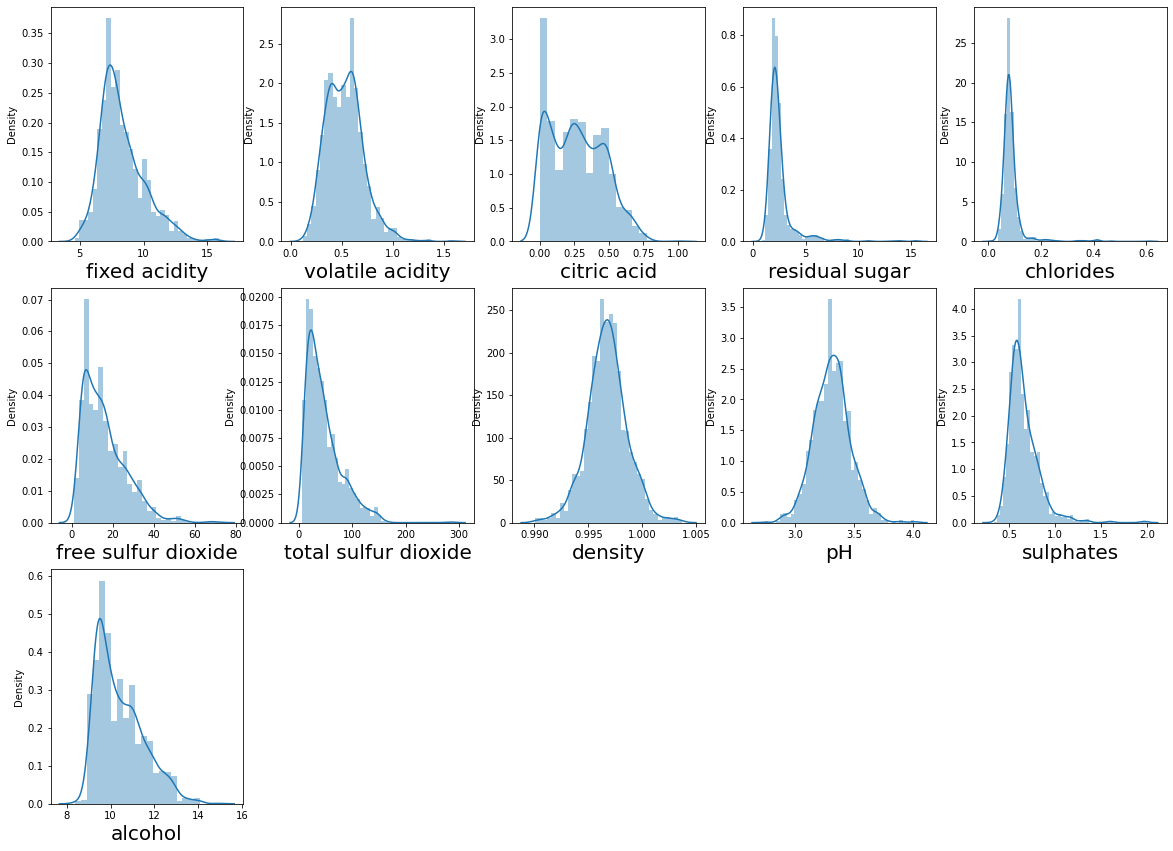

In [97]:
# visualising the skewness using displots
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in X:
    if plotnum<=11:
        plt.subplot(5,5,plotnum)
        sns.distplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

**Findings:**

The following columns show right skewed distributions:
1. fixed acidity
2. volatile acidity
3. residual sugar
4. chlorides
5. free sulfur dioxide
6. total sulfur dioxide
7. sulphates
8. alcohol

### Performing an outlier check

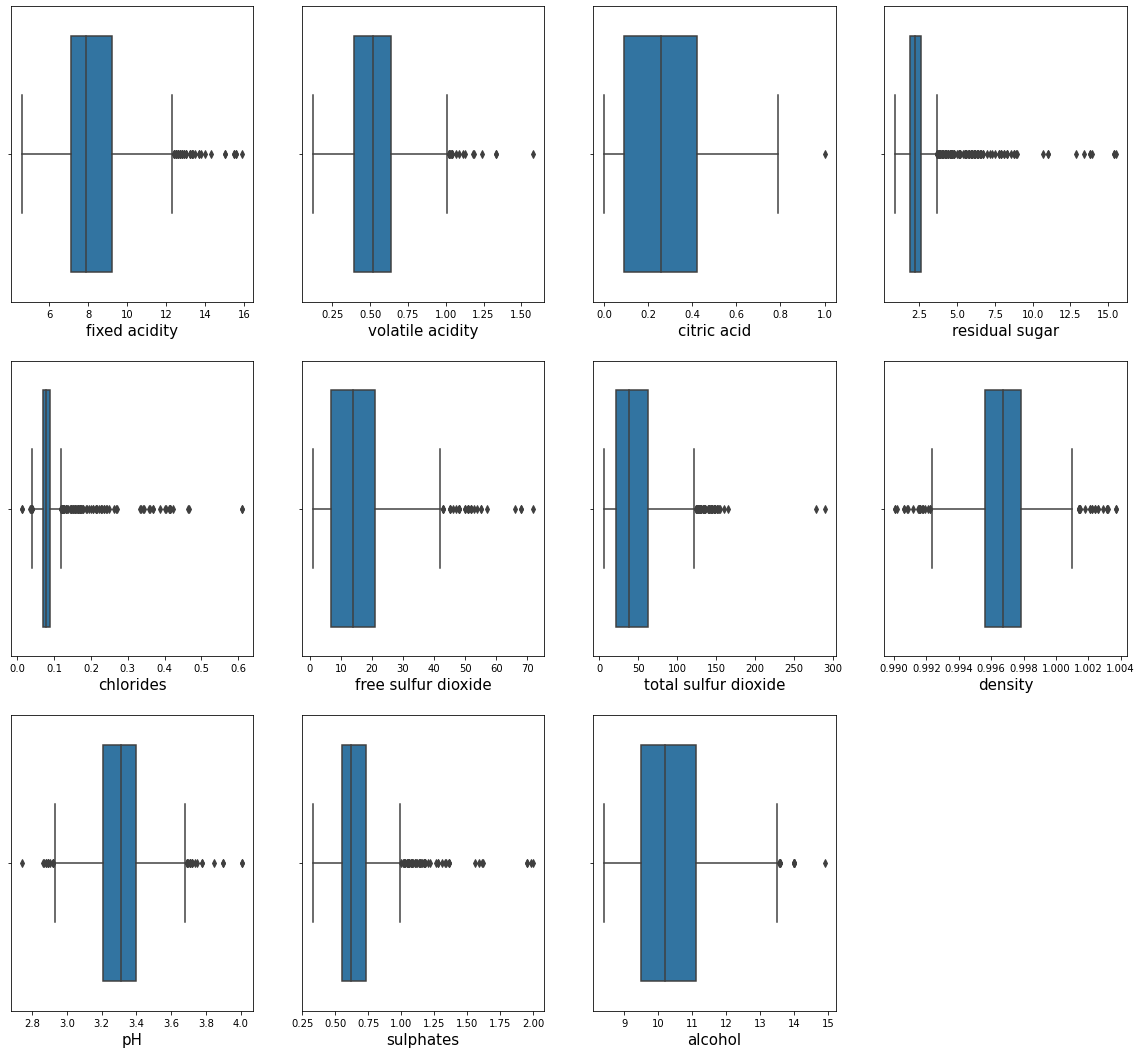

In [98]:
# plotting boxplots to check for presence of outliers
plt.figure(figsize=(20,25))
plotnum=1
for col in X:
    if plotnum<=11:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=15)
    plotnum+=1
plt.show()

It is clearly evident from the boxplots above that every column has at least some outliers, while several of them have lot of outliers.

### Attempting to remove outliers using z score

In [99]:
df2 = df.copy()

In [100]:
from scipy.stats import zscore
zs = zscore(df2)
z_score_abs = np.abs(zs)

df3 = df2[(z_score_abs < 3).all(axis=1)]

In [101]:
df3.shape, df2.shape

((1451, 13), (1599, 13))

In [102]:
# calculating data loss
data_loss = ((1599-1458)/1599) * 100
data_loss

8.818011257035648

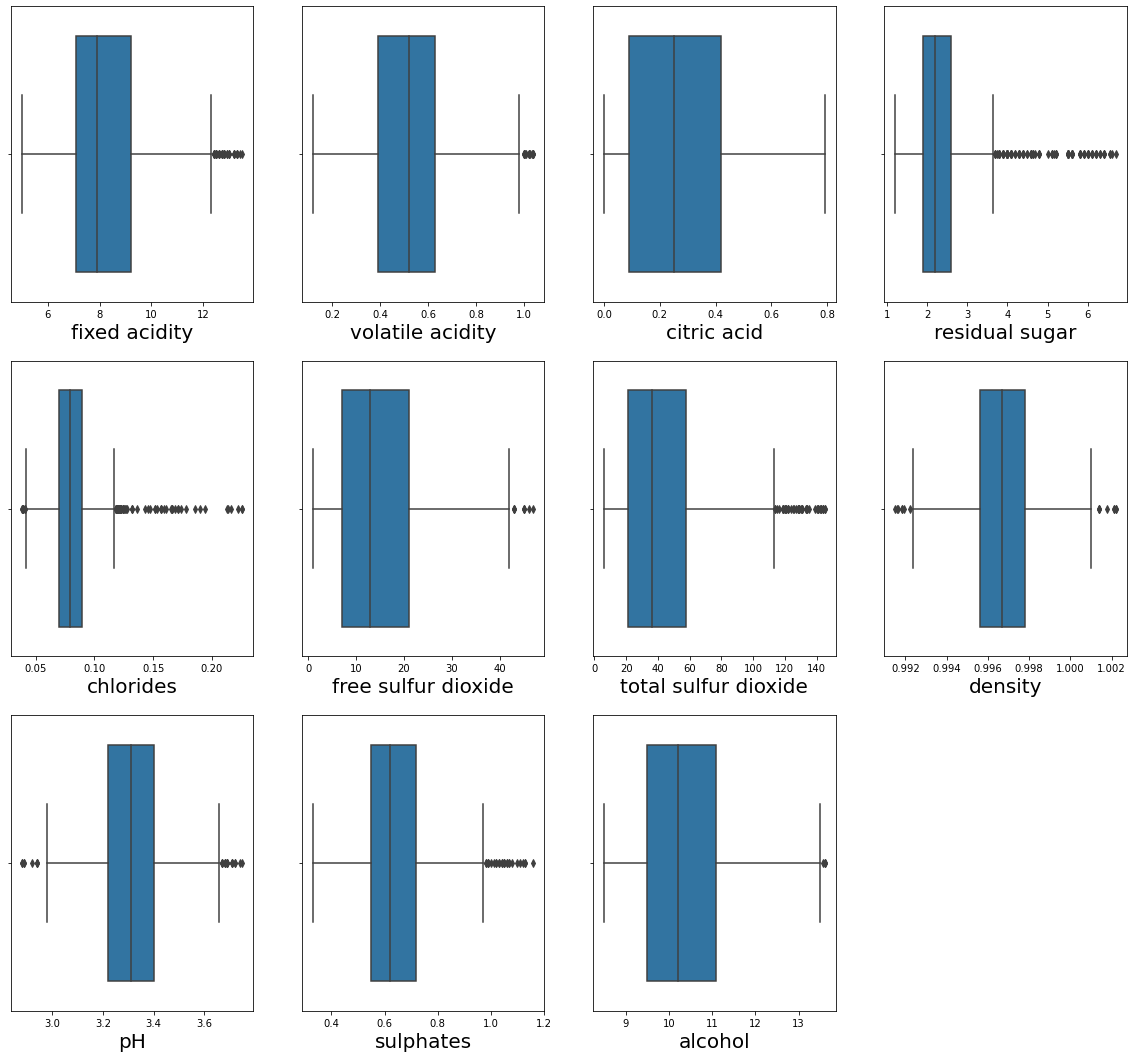

In [103]:
# rechecking the presence of outliers
plt.figure(figsize=(20,25))
plotnum=1
for col in df3:
    if plotnum<=11:
        plt.subplot(4,4,plotnum)
        sns.boxplot(df3[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Using z score did have some effect, but still there are a lot of outliers present in several columns

In [104]:
X.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

In [105]:
df3.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
quality_class          -0.170327
dtype: float64

### Using Power Transformer to further reduce skewness

In [106]:
from sklearn.preprocessing import PowerTransformer

In [64]:
feat_for_pt = df3.drop(columns = ['quality','quality_class'])

In [66]:
power_trans = PowerTransformer(method='yeo-johnson', standardize=True)

df_trans = power_trans.fit_transform(feat_for_pt)

In [67]:
type(df_trans)

numpy.ndarray

In [69]:
df_trans = pd.DataFrame(df_trans, columns=feat_for_pt.columns)

In [70]:
df_trans.skew()

fixed acidity           0.018666
volatile acidity        0.004945
citric acid             0.018049
residual sugar         -0.004606
chlorides              -0.114658
free sulfur dioxide    -0.021455
total sulfur dioxide   -0.005813
density                -0.001043
pH                     -0.000074
sulphates               0.020799
alcohol                 0.114658
dtype: float64

In [71]:
df_trans.index = df3.index

In [72]:
df3[feat_for_pt] = df_trans[feat_for_pt]

ValueError: Boolean array expected for the condition, not float64

In [107]:
df = df3.copy()

In [108]:
feat_for_pt = ['fixed acidity','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates','alcohol']

In [109]:
pt= PowerTransformer(method='yeo-johnson', standardize=True)

In [110]:
df4 = df[feat_for_pt].copy()

In [111]:
df4.skew()

fixed acidity           0.823934
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
sulphates               0.891492
alcohol                 0.758958
dtype: float64

In [112]:
df_trans = pt.fit_transform(df4)

In [113]:
type(df_trans)

numpy.ndarray

In [114]:
df_trans = pd.DataFrame(df_trans, columns=df4.columns)

In [115]:
df_trans.skew()

fixed acidity           0.018666
residual sugar         -0.004606
chlorides              -0.114658
free sulfur dioxide    -0.021455
total sulfur dioxide   -0.005813
sulphates               0.020799
alcohol                 0.114658
dtype: float64

In [116]:
df_trans.index = df.index

In [117]:
df[feat_for_pt] = df_trans[feat_for_pt]

In [118]:
X = df.drop(columns = ['quality','quality_class'])
y = df['quality_class']

In [119]:
X.skew()

fixed acidity           0.018666
volatile acidity        0.380659
citric acid             0.291297
residual sugar         -0.004606
chlorides              -0.114658
free sulfur dioxide    -0.021455
total sulfur dioxide   -0.005813
density                 0.055738
pH                      0.114705
sulphates               0.020799
alcohol                 0.114658
dtype: float64

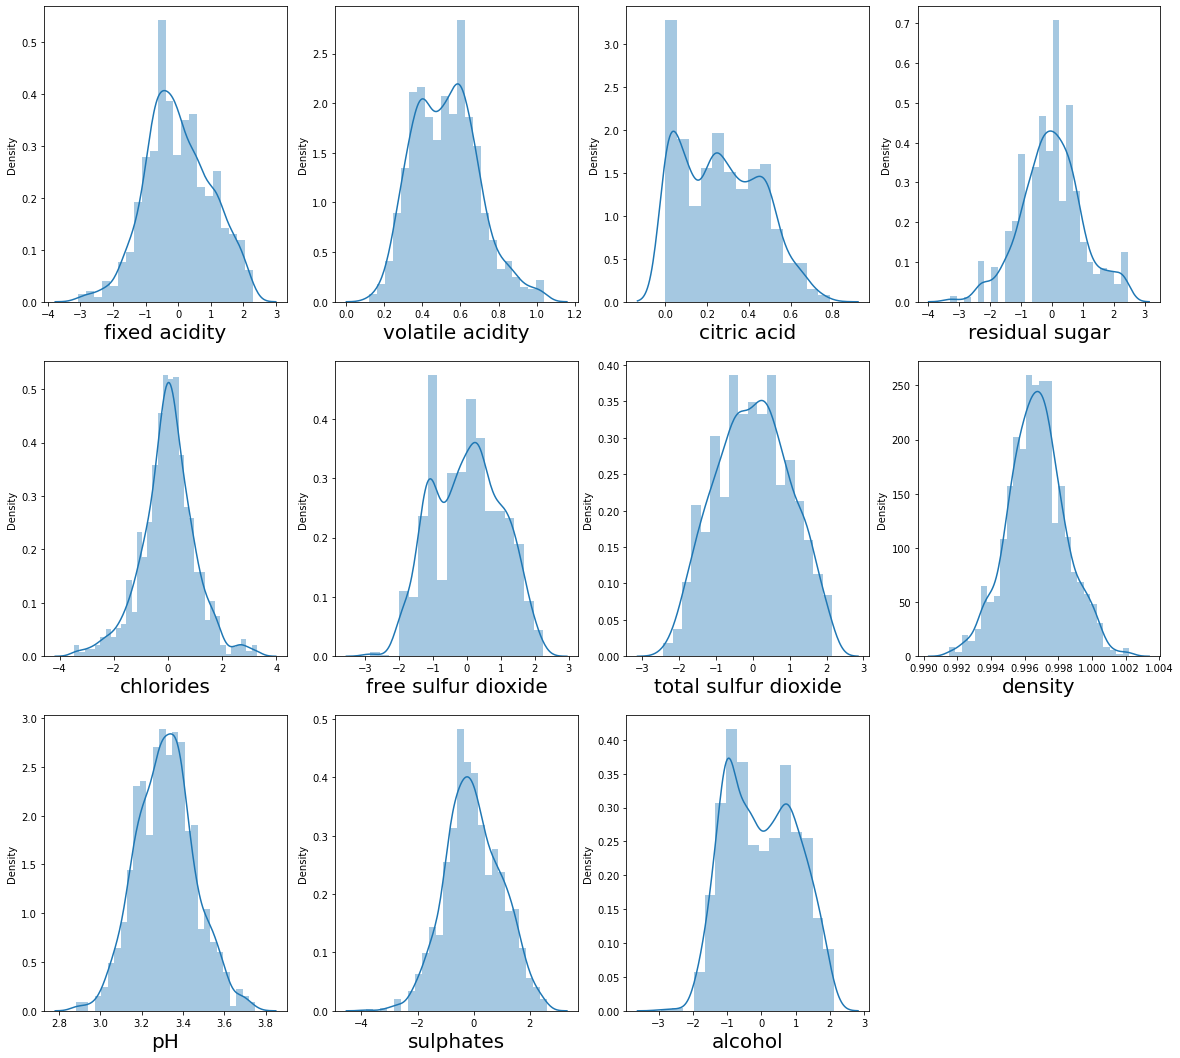

In [122]:
plt.figure(figsize=(20,25))
plotnum=1
for col in X:
    if plotnum<=11:
        plt.subplot(4,4,plotnum)
        sns.distplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

#### Now that are dataset looks much more normalised than when we started, we can move towards feature selection

## Scaling Data

In [123]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)

In [124]:
scaled_X

array([[-0.46787818,  1.05091371, -1.39039974, ...,  1.37589608,
        -0.58965734, -1.12042399],
       [-0.17080535,  2.11933582, -1.39039974, ..., -0.8219512 ,
         0.45152416, -0.5303401 ],
       [-0.17080535,  1.40705441, -1.18083057, ..., -0.3965614 ,
         0.22000451, -0.5303401 ],
       ...,
       [-1.45100718, -0.07686519, -0.70929993, ...,  0.73781138,
         0.93043194,  0.74288203],
       [-1.88546393,  0.72445139, -0.76169222, ...,  1.80128587,
         0.666655  , -0.03416625],
       [-1.7722373 , -1.26400088,  1.07203802, ...,  0.52511649,
         0.29909273,  0.74288203]])

## Multicollinearity Check

In [126]:
vif = pd.DataFrame()

In [127]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]

In [128]:
vif

,Features,vif
0,fixed acidity,6.870011
1,volatile acidity,1.837780
2,citric acid,2.966028
3,residual sugar,1.682277
4,chlorides,1.265877
5,free sulfur dioxide,2.820539
6,total sulfur dioxide,3.158303
7,density,5.582544
8,pH,3.182893
9,sulphates,1.371917


**Findings:**

The following features have high multicollinearity (above 5):
1. fixed acidity
2. density

## Selecting Best Features using SelectKBest

In [130]:
bestfeat = SelectKBest(score_func = f_classif, k = 11)
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [131]:
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(11,'Score'))

                 Feature       Score
10               alcohol  353.666184
9              sulphates  216.703489
1       volatile acidity  136.518317
6   total sulfur dioxide   70.479504
2            citric acid   43.418339
7                density   31.259814
4              chlorides   24.153932
0          fixed acidity   15.138257
5    free sulfur dioxide    5.669560
8                     pH    1.428586
3         residual sugar    0.717361


**Selections:**

Based on our findings, it appears we may drop pH and residual sugar due to low score, as well as fixed acidity as it has a lower score compared to density

In [132]:
best_feat = X.drop(columns = ['pH','residual sugar','fixed acidity'])
best_feat

,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
0,0.700,0.00,-0.145035,-0.241492,-0.066536,0.99780,-0.589657,-1.120424
1,0.880,0.00,0.986838,1.091561,0.952517,0.99680,0.451524,-0.530340
2,0.760,0.04,0.718578,0.238587,0.624244,0.99700,0.220005,-0.530340
3,0.280,0.56,-0.207213,0.440493,0.784119,0.99800,-0.393177,-0.530340
4,0.700,0.00,-0.145035,-0.241492,-0.066536,0.99780,-0.589657,-1.120424
...,...,...,...,...,...,...,...,...
1594,0.600,0.08,0.622975,1.530980,0.316130,0.99490,-0.393177,0.287037
1595,0.550,0.10,-1.120575,1.895825,0.537893,0.99512,0.992572,0.901563
1596,0.510,0.13,-0.145035,1.353642,0.173970,0.99574,0.930432,0.742882
1597,0.645,0.12,-0.207213,1.530980,0.316130,0.99547,0.666655,-0.034166


In [133]:
scaled_X = scaler.fit_transform(best_feat)

## Building the classification model

In [136]:
# finding the best random state
from sklearn.ensemble import RandomForestClassifier
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_X,y,test_size = .25, random_state = i)
    RF =  RandomForestClassifier()
    RF.fit(x_train,y_train)
    pred = RF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8484848484848485 on random_state: 49


In [137]:
x_train,x_test,y_train,y_test = train_test_split(scaled_X,y,test_size = .25, random_state = 49)

In [139]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
lr = LogisticRegression()
svc =  SVC()
knn = KNeighborsClassifier()

In [141]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [142]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [143]:
lr.fit(x_train, y_train)

LogisticRegression()

In [144]:
svc.fit(x_train, y_train)

SVC()

In [145]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

### Decision Tree

In [146]:
dt_pred = dt.predict(x_test)
acc = classification_report(y_test,dt_pred)

In [147]:
cnf_mat = confusion_matrix(y_test,dt_pred)
cnf_mat

array([[121,  42],
       [ 48, 152]], dtype=int64)

In [148]:
print(acc)

              precision    recall  f1-score   support

           0       0.72      0.74      0.73       163
           1       0.78      0.76      0.77       200

    accuracy                           0.75       363
   macro avg       0.75      0.75      0.75       363
weighted avg       0.75      0.75      0.75       363



### Logistic Regression

In [149]:
lr_pred = lr.predict(x_test)
acc = classification_report(y_test,lr_pred)

In [150]:
cnf_mat = confusion_matrix(y_test,lr_pred)
cnf_mat

array([[119,  44],
       [ 32, 168]], dtype=int64)

In [151]:
print(acc)

              precision    recall  f1-score   support

           0       0.79      0.73      0.76       163
           1       0.79      0.84      0.82       200

    accuracy                           0.79       363
   macro avg       0.79      0.79      0.79       363
weighted avg       0.79      0.79      0.79       363



### Random Forest

In [152]:
rf_pred = rf.predict(x_test)
acc = classification_report(y_test,rf_pred)

In [153]:
cnf_mat = confusion_matrix(y_test,rf_pred)
cnf_mat

array([[137,  26],
       [ 30, 170]], dtype=int64)

In [154]:
print(acc)

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       163
           1       0.87      0.85      0.86       200

    accuracy                           0.85       363
   macro avg       0.84      0.85      0.84       363
weighted avg       0.85      0.85      0.85       363



### SVC

In [155]:
svc_pred = svc.predict(x_test)
acc = classification_report(y_test,svc_pred)

In [156]:
cnf_mat = confusion_matrix(y_test,svc_pred)
cnf_mat

array([[122,  41],
       [ 31, 169]], dtype=int64)

In [157]:
print(acc)

              precision    recall  f1-score   support

           0       0.80      0.75      0.77       163
           1       0.80      0.84      0.82       200

    accuracy                           0.80       363
   macro avg       0.80      0.80      0.80       363
weighted avg       0.80      0.80      0.80       363



### KNN

In [158]:
knn_pred = knn.predict(x_test)
acc = classification_report(y_test,knn_pred)

In [159]:
cnf_mat = confusion_matrix(y_test,knn_pred)
cnf_mat

array([[110,  53],
       [ 42, 158]], dtype=int64)

In [160]:
print(acc)

              precision    recall  f1-score   support

           0       0.72      0.67      0.70       163
           1       0.75      0.79      0.77       200

    accuracy                           0.74       363
   macro avg       0.74      0.73      0.73       363
weighted avg       0.74      0.74      0.74       363



## Model Cross Validation

In [161]:
from sklearn.model_selection import cross_val_score as cvs

In [163]:
print("Cross Validation Result for Decision Tree: ", cvs(dt,scaled_X,y,cv=5).mean())
print("\n")
print("Cross Validation Result for Logistic Regression: ", cvs(lr,scaled_X,y,cv=5).mean())
print("\n")
print("Cross Validation Result for Random Forest: ", cvs(rf,scaled_X,y,cv=5).mean())
print("\n")
print("Cross Validation Result for SVC: ", cvs(svc,scaled_X,y,cv=5).mean())
print("\n")
print("Cross Validation Result for KNN: ", cvs(knn,scaled_X,y,cv=5).mean())

Cross Validation Result for Decision Tree:  0.6402678042422087


Cross Validation Result for Logistic Regression:  0.7209100604337008


Cross Validation Result for Random Forest:  0.7126578978551961


Cross Validation Result for SVC:  0.7209148003317928


Cross Validation Result for KNN:  0.6919682426827823


## ROC AUC Scores

In [164]:
print("ROC AUC Score for Decision Tree: ", roc_auc_score(y_test,dt_pred))
print("\n")
print("ROC AUC Score for Logistic Regression: ", roc_auc_score(y_test,lr_pred))
print("\n")
print("ROC AUC Score for Random Forest: ", roc_auc_score(y_test,rf_pred))
print("\n")
print("ROC AUC Score for SVC: ", roc_auc_score(y_test,svc_pred))
print("\n")
print("ROC AUC Score for KNN: ", roc_auc_score(y_test,knn_pred))

ROC AUC Score for Decision Tree:  0.7511656441717791


ROC AUC Score for Logistic Regression:  0.7850306748466257


ROC AUC Score for Random Forest:  0.8452453987730062


ROC AUC Score for SVC:  0.7967331288343558


ROC AUC Score for KNN:  0.7324233128834355


**It appears that `Random Forest Classifier` is giving us the highest ROC AUC Score and therefore the best model for our dataset.**

### Plotting the ROC AUC Curve

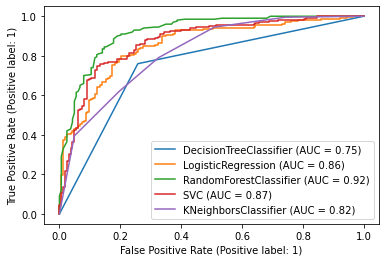

In [165]:
disp = plot_roc_curve(dt,x_test,y_test)
mod = [lr,rf,svc,knn]
for i in mod:
    plot_roc_curve(i,x_test,y_test, ax=disp.ax_)
plt.legend(prop={'size':10}, loc = 'lower right')
plt.show()

#### Based on the above curve plotted, Random Forest Classifier has the highest Area Under the ROC Curve (AUC), i.e. it is the best model for the dataset.

## Hyperparameter Tuning

In [167]:
parameter = {'n_estimators':[30,50,60],
             'max_depth': [10,20,40,60,80],
             'min_samples_leaf':[5,10,15,20,30],
             'min_samples_split':[2,5,10,20],
             'criterion':['gini','entropy'],
             'max_features':["auto","sqrt","log2"]
            }

In [168]:
gcv = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1)

In [169]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 40, 60, 80],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 15, 20, 30],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [30, 50, 60]})

In [170]:
gcv.best_params_

{'criterion': 'entropy',
 'max_depth': 80,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 50}

In [188]:
best_model = RandomForestClassifier(n_estimators = 50,criterion = 'entropy', max_depth= 80, max_features = 'log2',min_samples_leaf = 5, min_samples_split = 2)
best_model.fit(x_train,y_train)
rf_pred2 = best_model.predict(x_test)
acc = accuracy_score(y_test,rf_pred2)
print(acc)

0.8402203856749312


In [189]:
conf_matrx = confusion_matrix(y_test,rf_pred2)
conf_matrx

array([[134,  29],
       [ 29, 171]], dtype=int64)

#### Our best model is `Random Forest Classifier` with an accuracy score of `84.02%`, and performs better than other models in terms of confusion matrix as well.

### Saving the model using joblib

In [190]:
import joblib
joblib.dump(best_model,"Wine Quality Model.pkl")

['Wine Quality Model.pkl']

# `END`